# The GeoPandas collect method

The collect method is called on the tools module of the GeoPandas object.  It takes a GeoDataSeries or other Python iterable of simple geometries and combines them into a single multi-type geometry.

Lets load some data.

In [1]:
%matplotlib inline
import geopandas as gpd

raptor = gpd.read_file("data/Raptor_Nests.shp")
raptor

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,geometry
0,361.0,40.267502,-104.870872,2012-03-16,Swainsons Hawk,INACTIVE NEST,361,POINT (-104.79595 40.29891)
1,362.0,40.264321,-104.860255,2012-03-16,Swainsons Hawk,INACTIVE NEST,362,POINT (-104.78897 40.22089)
2,1.0,38.650081,-105.494251,2014-07-28,Swainsons Hawk,INACTIVE NEST,1,POINT (-105.50223 38.68694)
3,2.0,40.309574,-104.932604,2011-01-06,Swainsons Hawk,INACTIVE NEST,2,POINT (-104.84889 40.35215)
4,3.0,40.219343,-104.729246,2014-07-03,Swainsons Hawk,ACTIVE NEST,3,POINT (-104.74466 40.18571)
...,...,...,...,...,...,...,...,...
874,911.0,40.006950,-104.894370,2015-08-18,Red-tail Hawk,INACTIVE NEST,911,POINT (-104.98394 40.00297)
875,912.0,39.998876,-104.900128,2015-09-01,Red-tail Hawk,INACTIVE NEST,912,POINT (-104.84766 39.96975)
876,NaN,NaN,NaN,2020-05-08,Northern Harrier,INACTIVE NEST,9991,POINT (-104.95039 40.24432)
877,NaN,NaN,NaN,2020-05-05,SWHA,INACTIVE NEST,1001,POINT (-104.94502 40.24443)


In [2]:
active_nests = raptor[raptor['recentstat']=='ACTIVE NEST']['geometry']
active_nests

4      POINT (-104.74466 40.18571)
7      POINT (-104.67679 40.30686)
15     POINT (-105.05943 40.19046)
25     POINT (-104.72963 40.23480)
26     POINT (-104.87677 40.23926)
                  ...             
845    POINT (-104.98760 40.00910)
847    POINT (-104.91311 40.00704)
848    POINT (-104.92905 40.24316)
849    POINT (-105.15664 39.92748)
860    POINT (-104.72328 40.47858)
Name: geometry, Length: 251, dtype: geometry

In [3]:
active_nests = gpd.tools.collect(active_nests)
active_nests.type

C:\Users\merve\AppData\Local\Temp\ipykernel_24748\3751761126.py:2: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  active_nests.type


'MultiPoint'

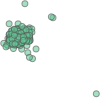

In [4]:
active_nests

# Converting all geometries to multi types.

In GeoPandas, like PostGIS it is possible to have multiple geometry types in a single geometry column.  Although this can have useful applications, it can cause issues with certain data storage formats.  It can also cause problems when importing into certain software and if you manipulate the geometry from other platforms as we saw in the last lecture where we had to account for the possibility that the geometry of the linear table could be either a LineString or a MultiLineString

As a result it is often preferable to convert all single type geometries to multi-type geometries in order to provide a consistent analysis and programming platform.  We can use the collect method for this purpose as well by setting its multi parameter equal to True in order to force the resulting geometry into a multi-type geometry. 

This is actually what I have used the collect method for the most.

Lets convert the point geometries of the raptor GeoDataFrame to MultiPoint geometry.

In [5]:
raptor.head()

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,geometry
0,361.0,40.267502,-104.870872,2012-03-16,Swainsons Hawk,INACTIVE NEST,361,POINT (-104.79595 40.29891)
1,362.0,40.264321,-104.860255,2012-03-16,Swainsons Hawk,INACTIVE NEST,362,POINT (-104.78897 40.22089)
2,1.0,38.650081,-105.494251,2014-07-28,Swainsons Hawk,INACTIVE NEST,1,POINT (-105.50223 38.68694)
3,2.0,40.309574,-104.932604,2011-01-06,Swainsons Hawk,INACTIVE NEST,2,POINT (-104.84889 40.35215)
4,3.0,40.219343,-104.729246,2014-07-03,Swainsons Hawk,ACTIVE NEST,3,POINT (-104.74466 40.18571)


In [6]:
raptor['geometry'] = gpd.tools.collect(raptor['geometry'], multi=True)
raptor.head()

,postgis_fi,lat_y_dd,long_x_dd,lastsurvey,recentspec,recentstat,Nest_ID,geometry
0,361.0,40.267502,-104.870872,2012-03-16,Swainsons Hawk,INACTIVE NEST,361,"MULTIPOINT (-104.79595 40.29891, -104.78897 40..."
1,362.0,40.264321,-104.860255,2012-03-16,Swainsons Hawk,INACTIVE NEST,362,"MULTIPOINT (-104.79595 40.29891, -104.78897 40..."
2,1.0,38.650081,-105.494251,2014-07-28,Swainsons Hawk,INACTIVE NEST,1,"MULTIPOINT (-104.79595 40.29891, -104.78897 40..."
3,2.0,40.309574,-104.932604,2011-01-06,Swainsons Hawk,INACTIVE NEST,2,"MULTIPOINT (-104.79595 40.29891, -104.78897 40..."
4,3.0,40.219343,-104.729246,2014-07-03,Swainsons Hawk,ACTIVE NEST,3,"MULTIPOINT (-104.79595 40.29891, -104.78897 40..."
